In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

# What is machine learning ?

### When we need Machine Learning

When the business logic is too complicated to be directly coded like for voice recognition, or logic is hidden like for customer behaviour on website, machine learning can be used to find this mysterious business logic.

<img src=" 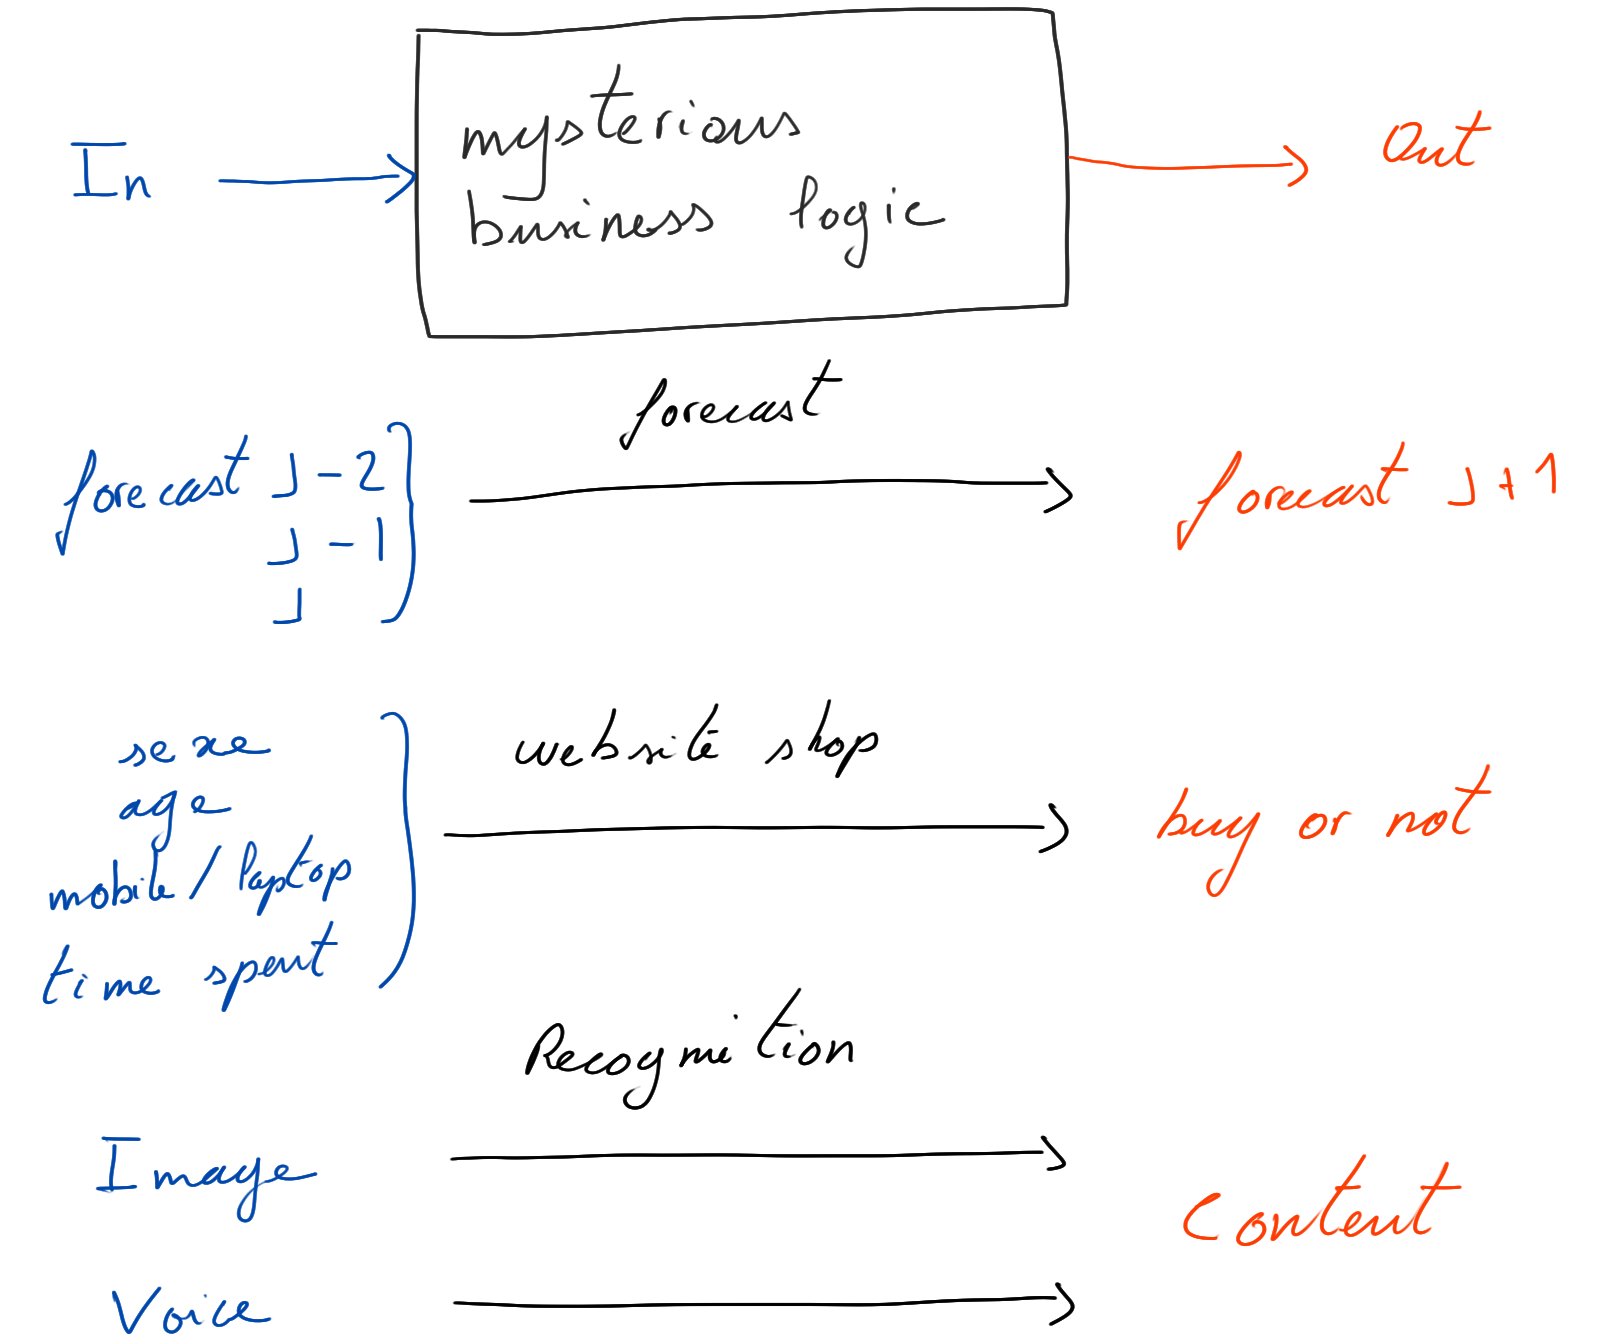">

## How it "learn" ?

First we select a mathematics model parametrable like a polynom or a decision tree. Then an optimizer will compare output given by model and output expected, it will tun parameters to minimize this error.

<img src=" 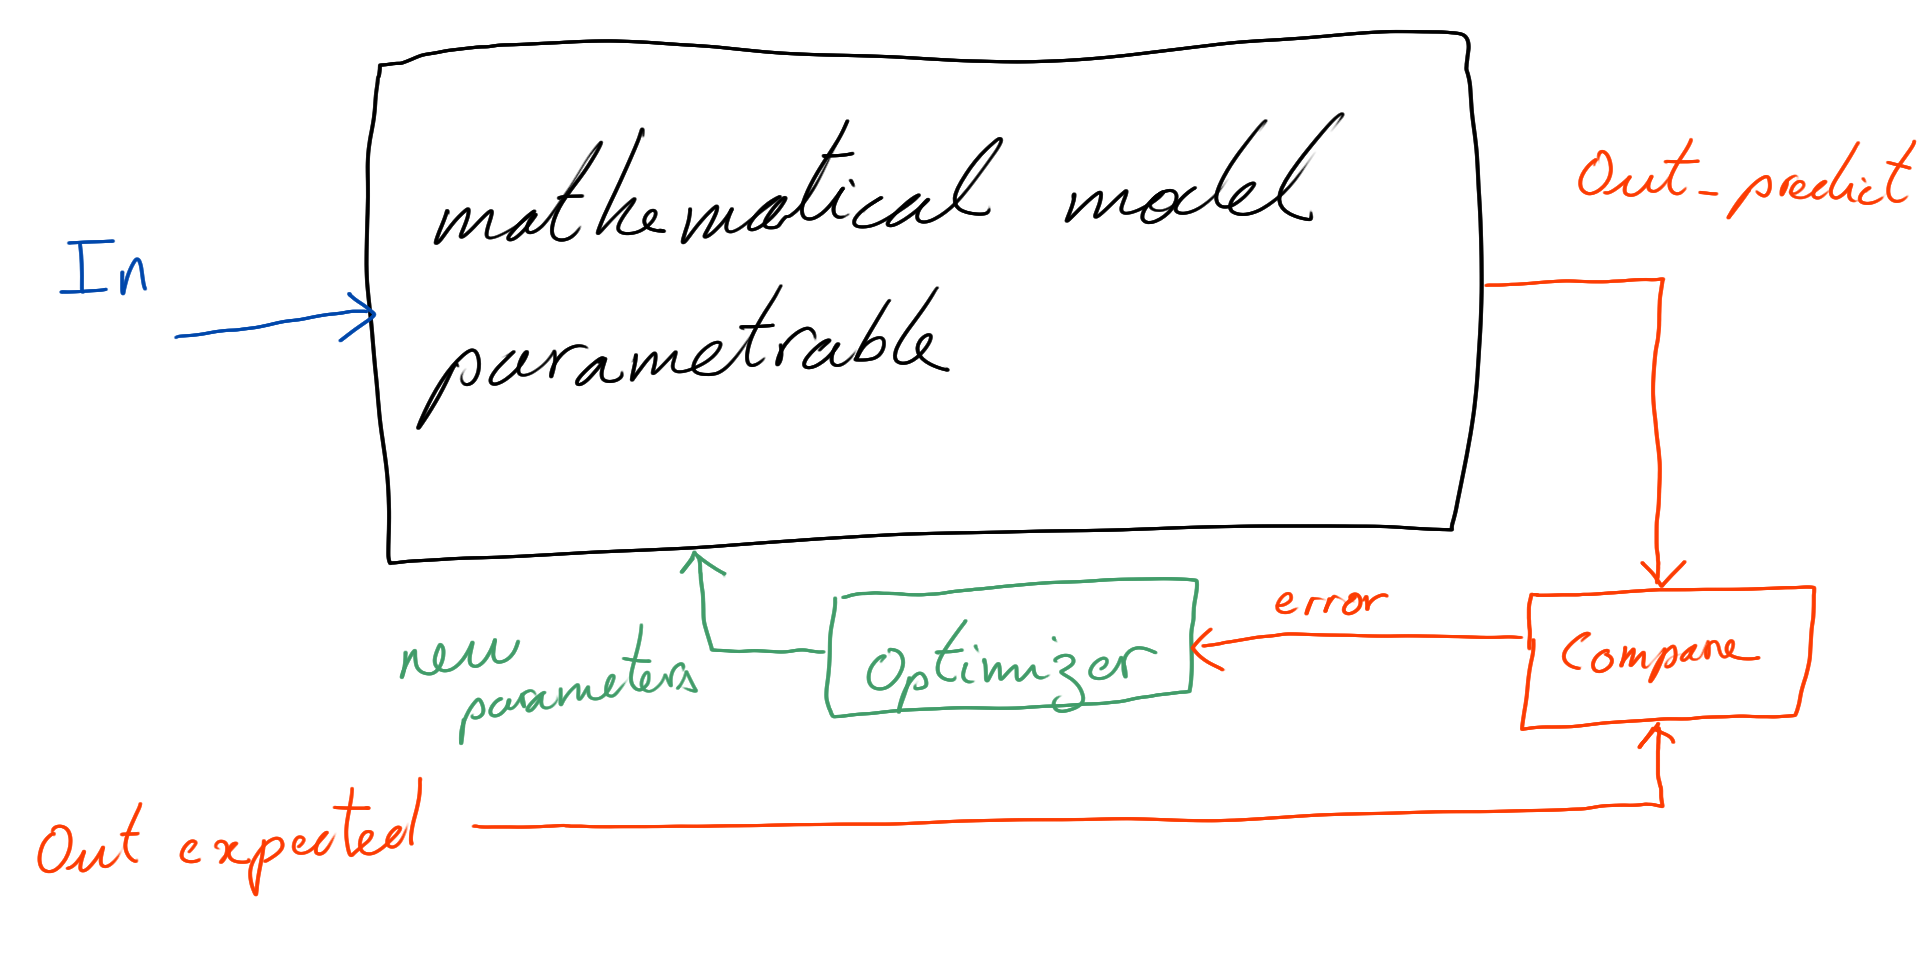">

## How many machine learning exist

Many! There are two kinds :
- **classifier:** according to input, it will try to select an category as output. Ex: try to find if customer will buy someting, sort cat images, etc
- **regression:** according to input, it will try to predict values. Ex: all forecast purpose, ... 

<img src=" 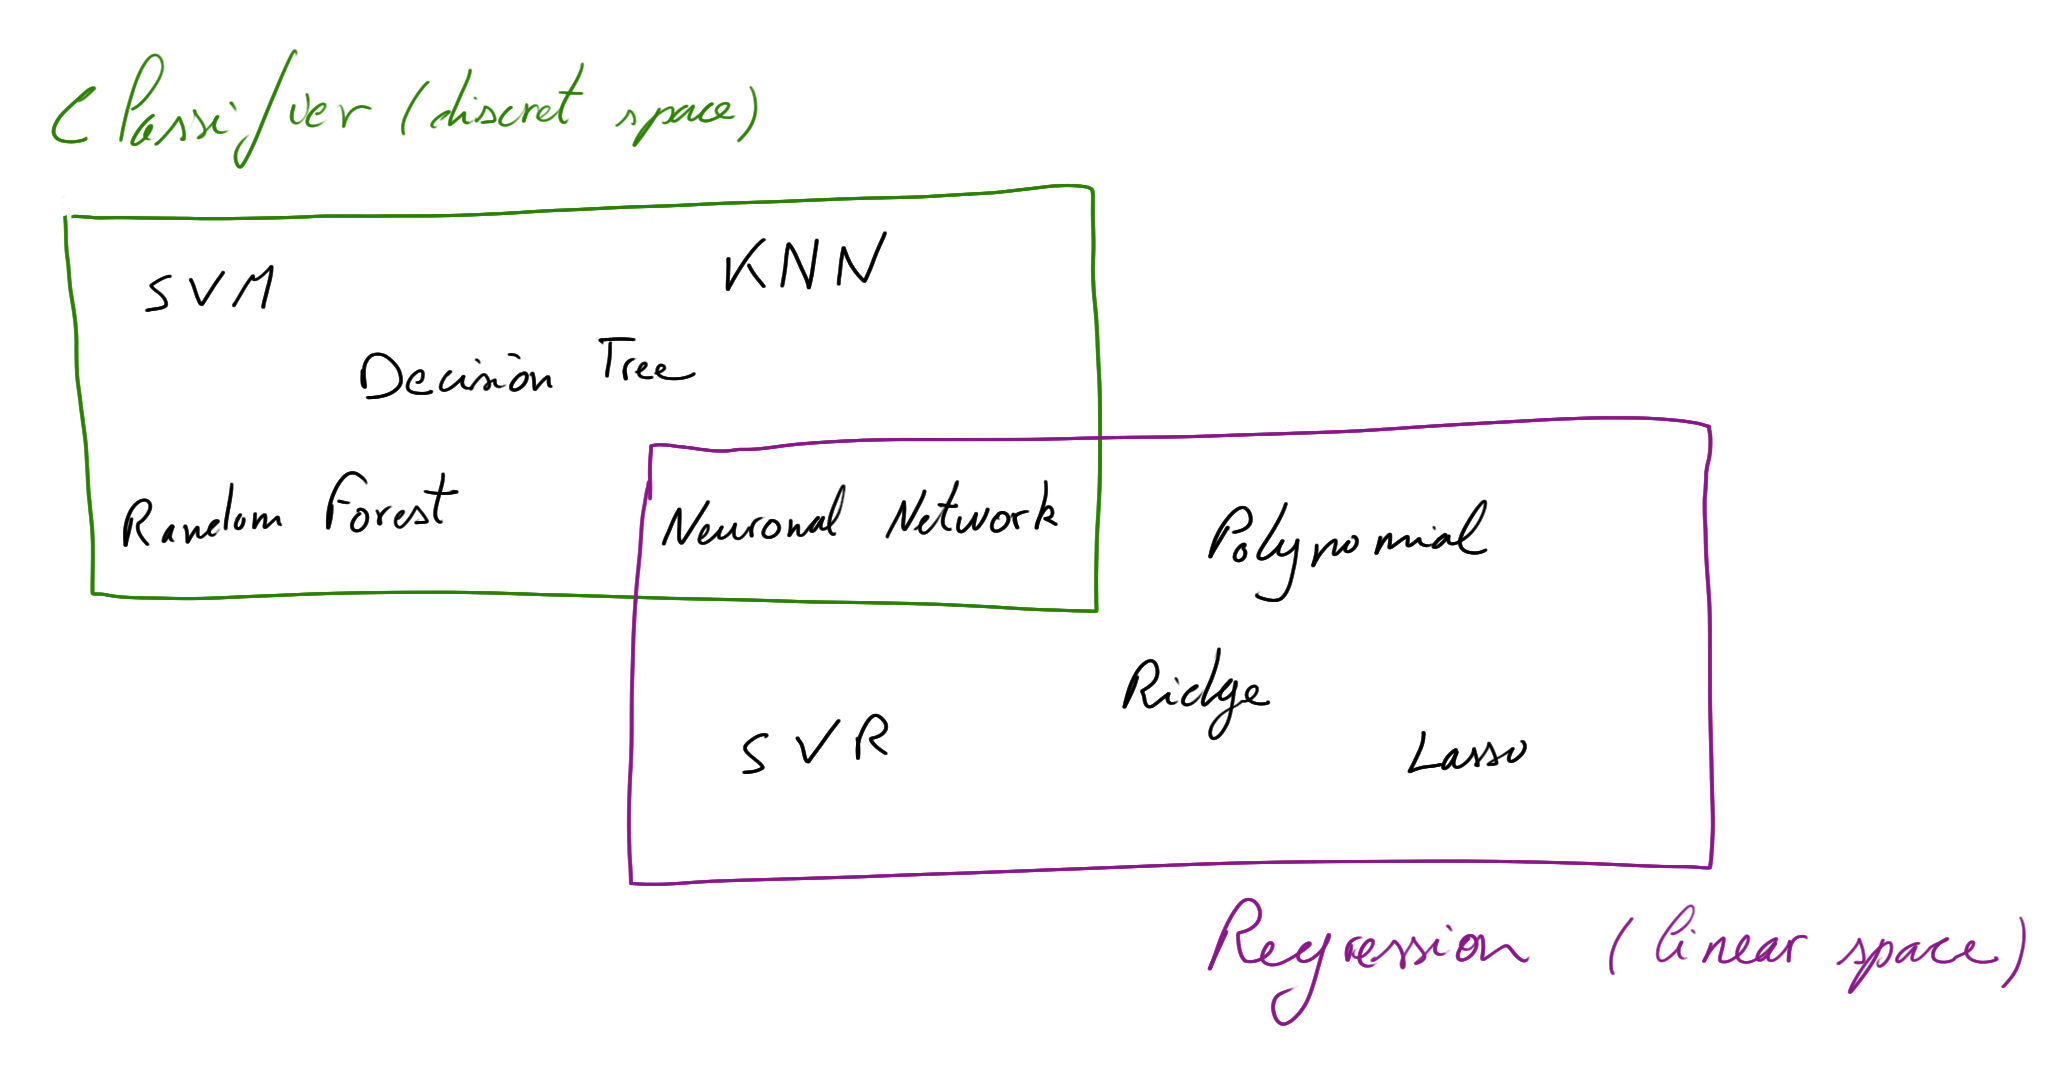">

# How to represent business to learn ?

[Source dataset representation](https://towardsdatascience.com/making-deep-neural-networks-paint-to-understand-how-they-work-4be0901582ee)

Represent a whole dataset to be visualize quickly, is complicated with real user case. Can you quick see a classifier dataset when you look a huge table full of numbers ?

But if you chose machine learning such as input is a position and output is a color. Then each prediction becomes a pixel and the whole dataset an image.

<img src=" 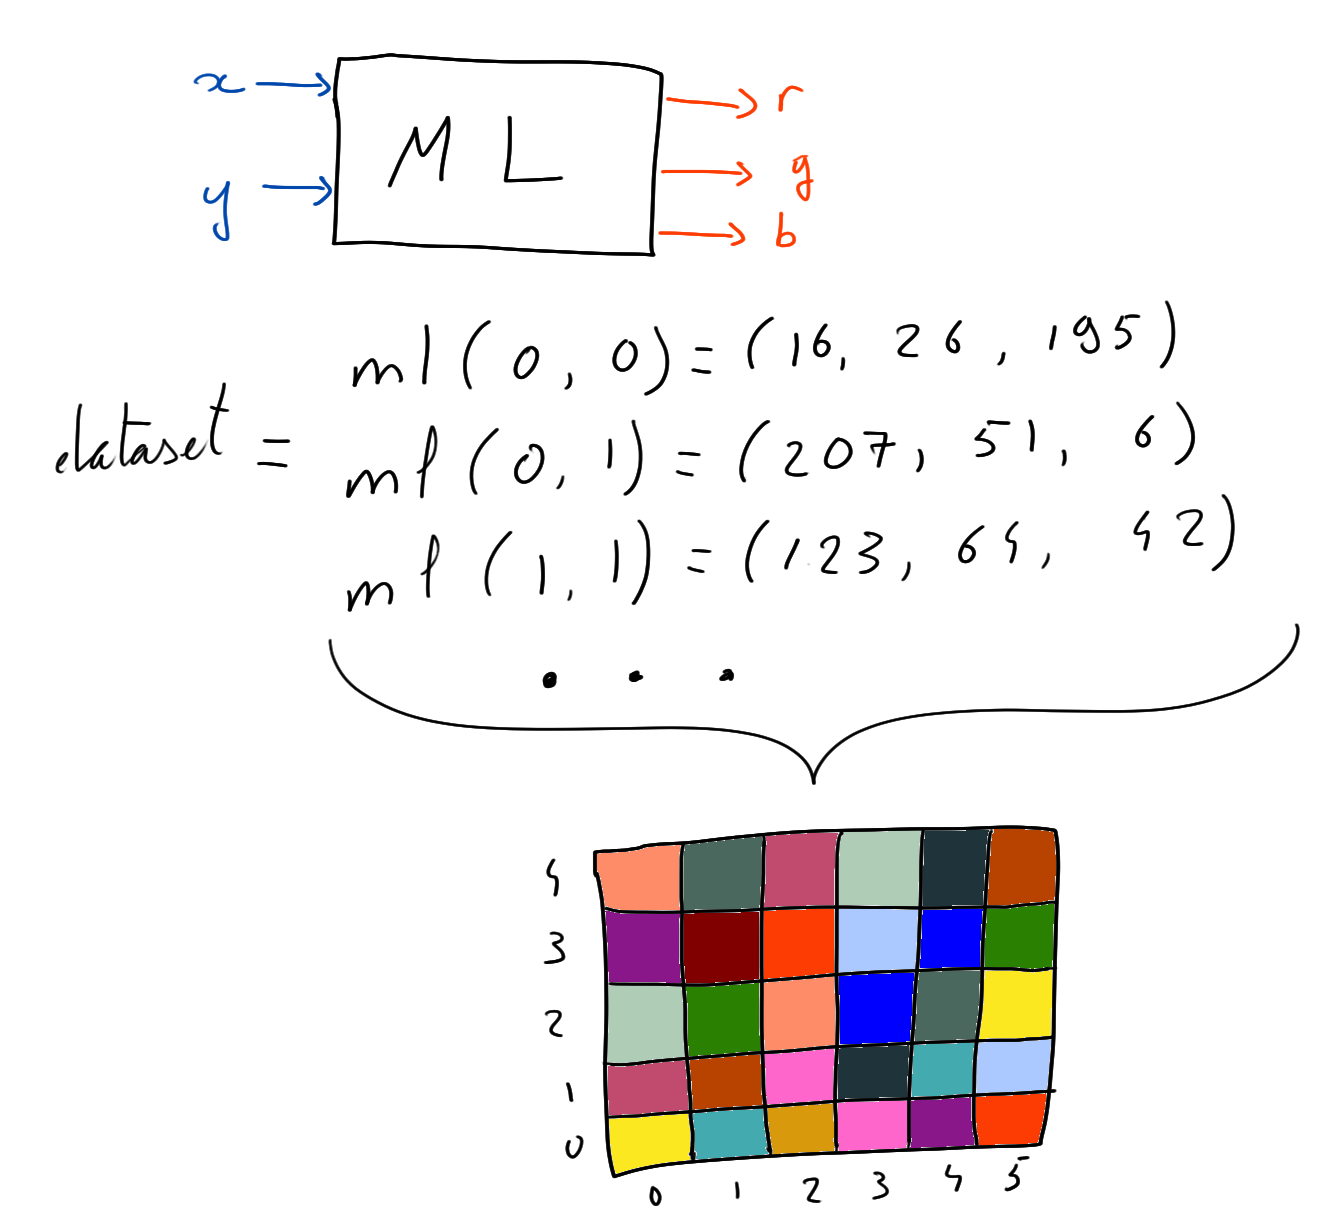">

In [11]:
def classifier_business(x, y):
    if x<0.2 and y > 0.3:
        return (0.9, 0.1, 0.1)
    if x > 0.6:
        return (0.1, 0.9, 0.1)
    return (0.1, 0.1, 0.9)

In [12]:
def regression_business(x, y):
    return (x + y) / 2, (1- x + y) / 2, (2 - x + y) / 2

In [13]:
def business_to_dataset(size, mapping):
    # Apply mapping over all pixel grid
    dataset = np.empty((size, size, 3))
    space = np.linspace(0, 1, size)
    for x in range(0, size):
        for y in range(size-1, -1, -1):
            dataset[y, x] = mapping(space[x], 1-space[y])
    return dataset

In [14]:
def print_dataset(datasets, titles=''):
    # Print image if there are only one image
    if type(datasets) != list:
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.imshow(datasets)
        ax.set_title(titles)
        ax.set_xticklabels(['-0.2', '0', '0.2', '0.4', '0.6', '0.8', '1'])
        ax.set_yticklabels(['1.2', '1', '0.8', '0.6', '0.4', '0.2', '0'])
        
    # Pring images if there are many images
    else:
        size = len(datasets)
        fig, axis = plt.subplots(ncols=size, figsize=(6*size, 6))
        for (ax, dataset, t) in zip(axis, datasets, titles):   
            ax.imshow(dataset)
            ax.set_title(t)
            ax.set_xticklabels(['-0.2', '0', '0.2', '0.4', '0.6', '0.8', '1'])
            ax.set_yticklabels(['1.2', '1', '0.8', '0.6', '0.4', '0.2', '0'])
            
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


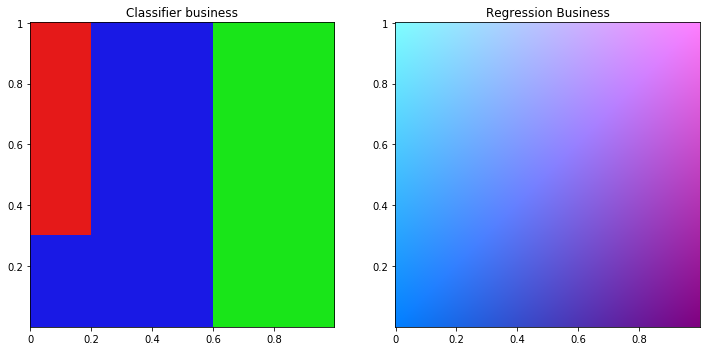

In [15]:
classifier_dataset = business_to_dataset(500, classifier_business)
regression_dataset = business_to_dataset(500, regression_business)
print_dataset([classifier_dataset, regression_dataset], ['Classifier business', 'Regression Business'])

In [16]:
def pick_pixels(dataset, number):
    index = np.random.randint(0, 500, size=(number, 2))
    space = np.linspace(0, 1, 500)
    
    pixels = dataset[index[:, 1], index[:, 0]]
    xy = np.array([[space[x], space[y]] for x, y in index])
    return xy.astype('float'), pixels

In [17]:
def apply_ml(ml, dataset, size=200):
    xy, pixels = pick_pixels(dataset, size)
    ml.fit(xy, pixels)
    
    X,Y = np.mgrid[0:1:0.002, 0:1:0.002]
    xy = np.vstack((X.flatten(), Y.flatten())).T
    return ml.predict(xy).reshape(500, 500, 3).transpose(1, 0, 2)

In [18]:
def discretize_dataset(i):
    return np.round(i * 100).astype('int')

# Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

<img src=" 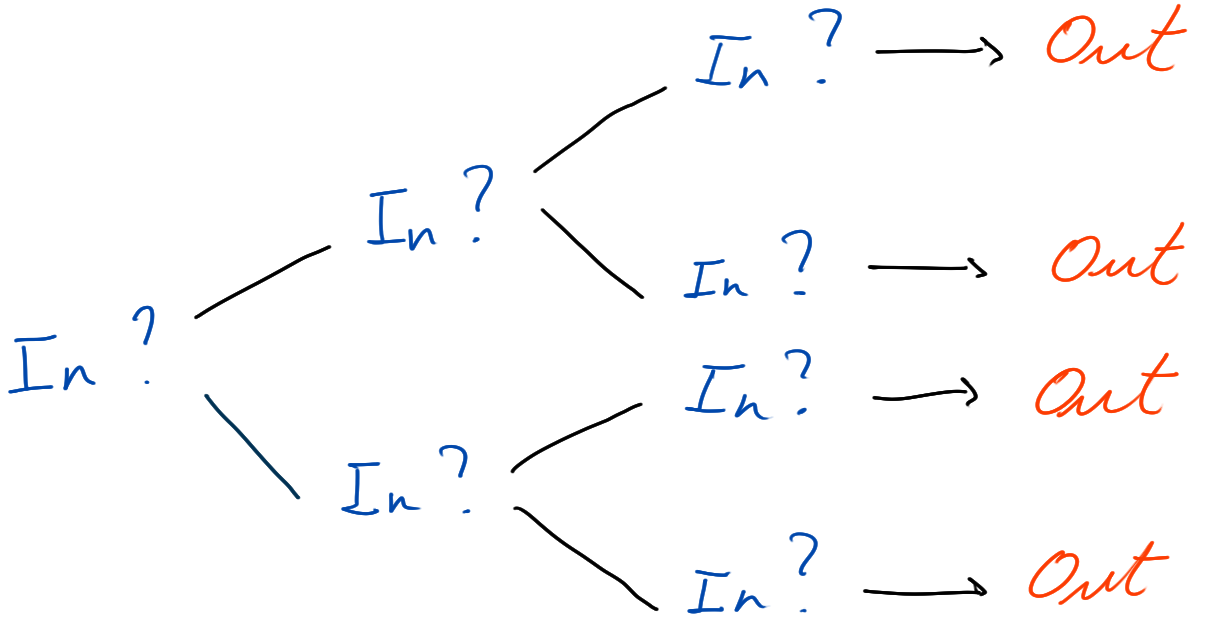">

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


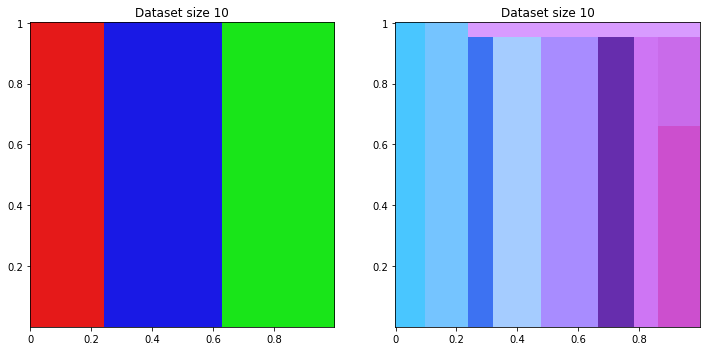

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


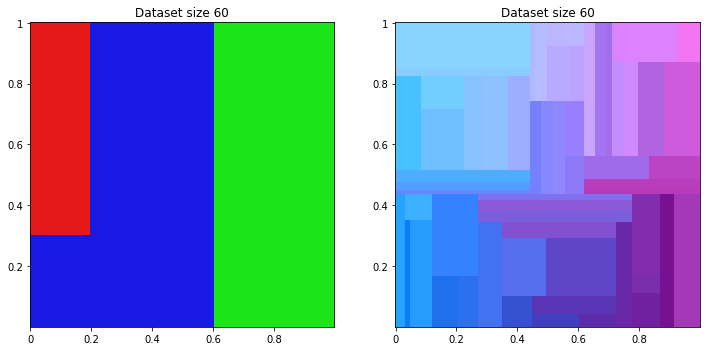

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


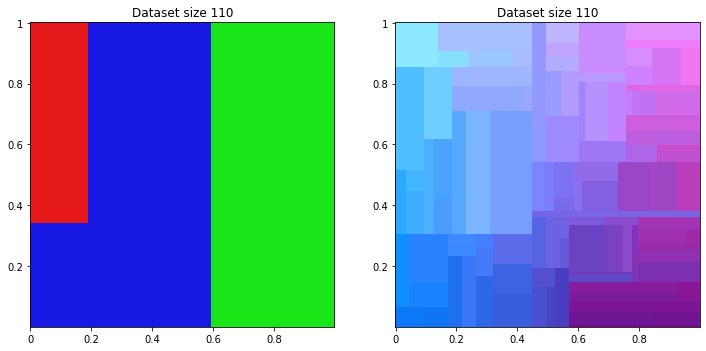

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


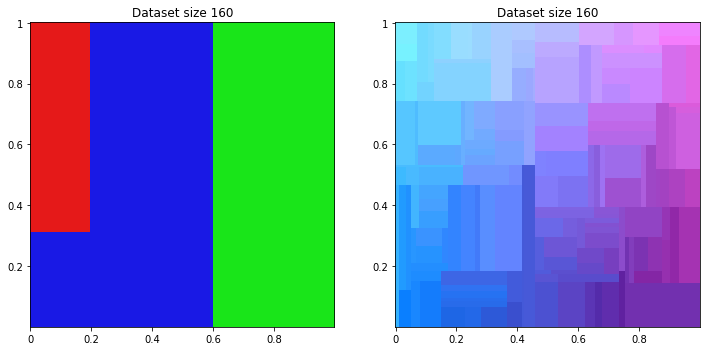

In [20]:
for size in range(10, 200, 50):
    class_class_dataset = apply_ml(DecisionTreeClassifier(), discretize_dataset(classifier_dataset), size) / 100
    class_reg_dataset   = apply_ml(DecisionTreeClassifier(), discretize_dataset(regression_dataset), size) / 100
    title = 'Dataset size {}'.format(size)
    print_dataset([class_class_dataset, class_reg_dataset], [title, title])

# Regression

In [21]:
from sklearn.linear_model import LinearRegression

<img src=" 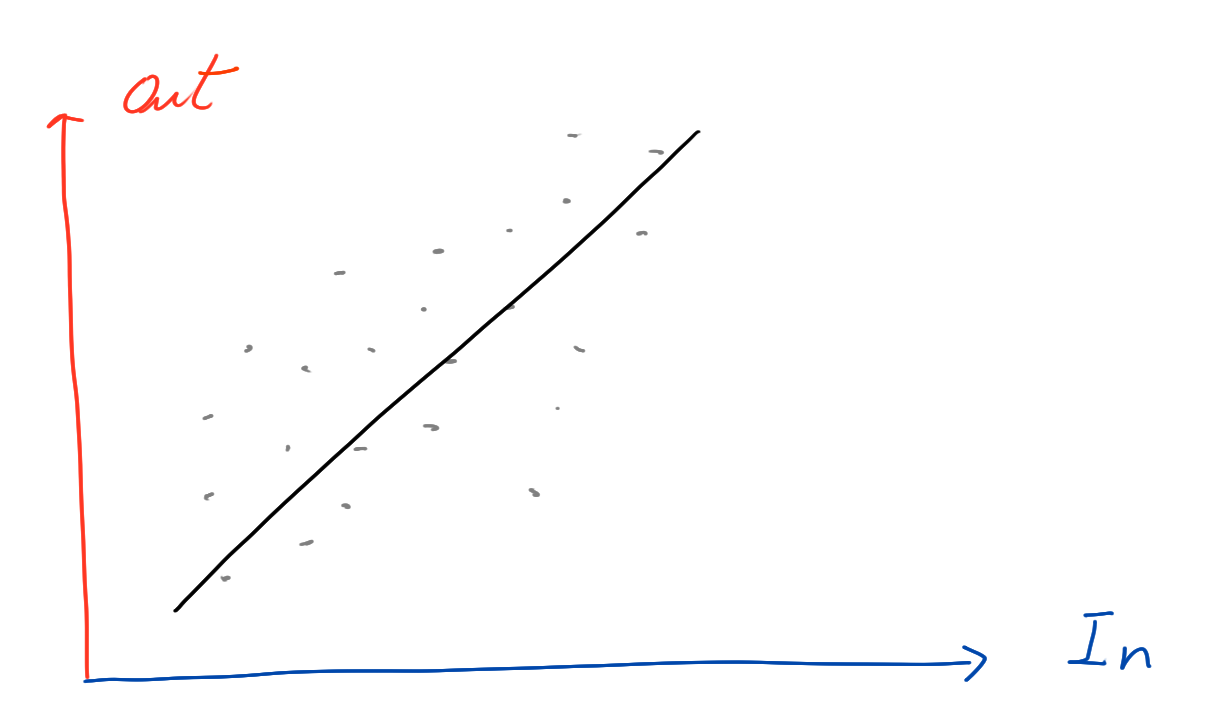">

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


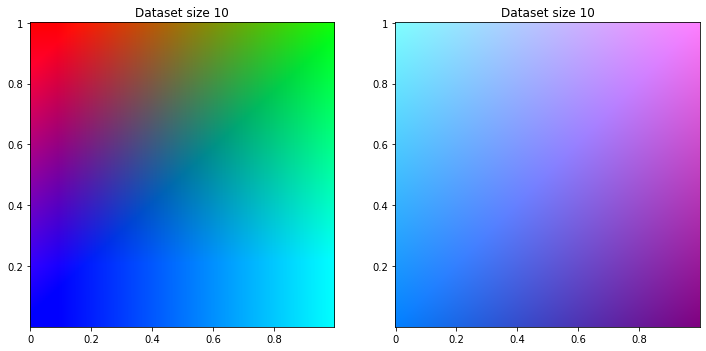

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


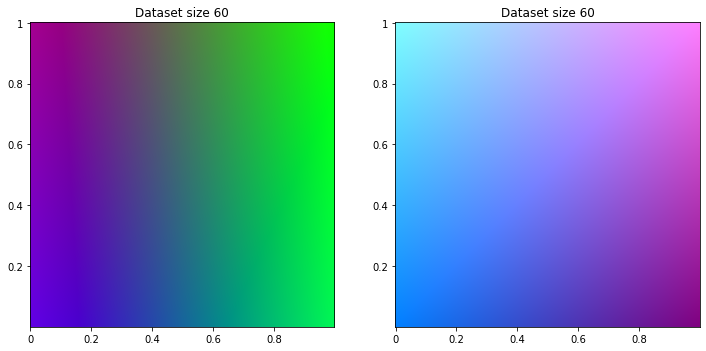

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


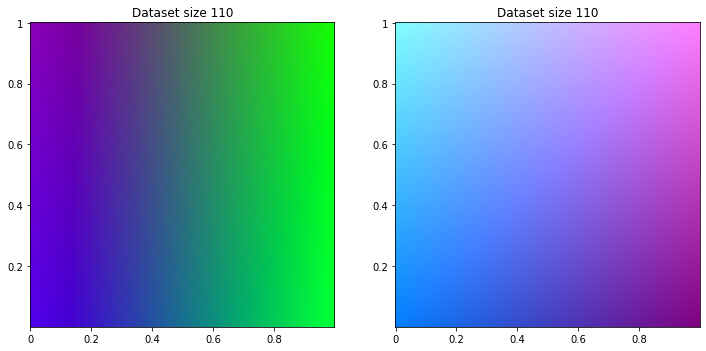

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


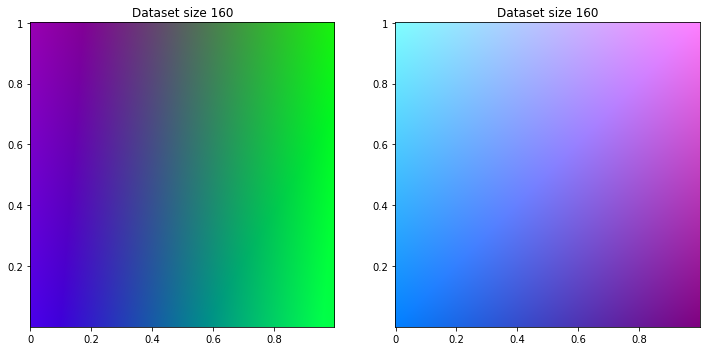

In [22]:
for size in range(10, 200, 50):
    reg_class_dataset = apply_ml(LinearRegression(), classifier_dataset, size)
    reg_reg_dataset   = apply_ml(LinearRegression(), regression_dataset, size)
    title = 'Dataset size {}'.format(size)
    print_dataset([reg_class_dataset, reg_reg_dataset], [title, title])

# Neuronal Network

In [23]:
import tensorflow as tf

<img src=" 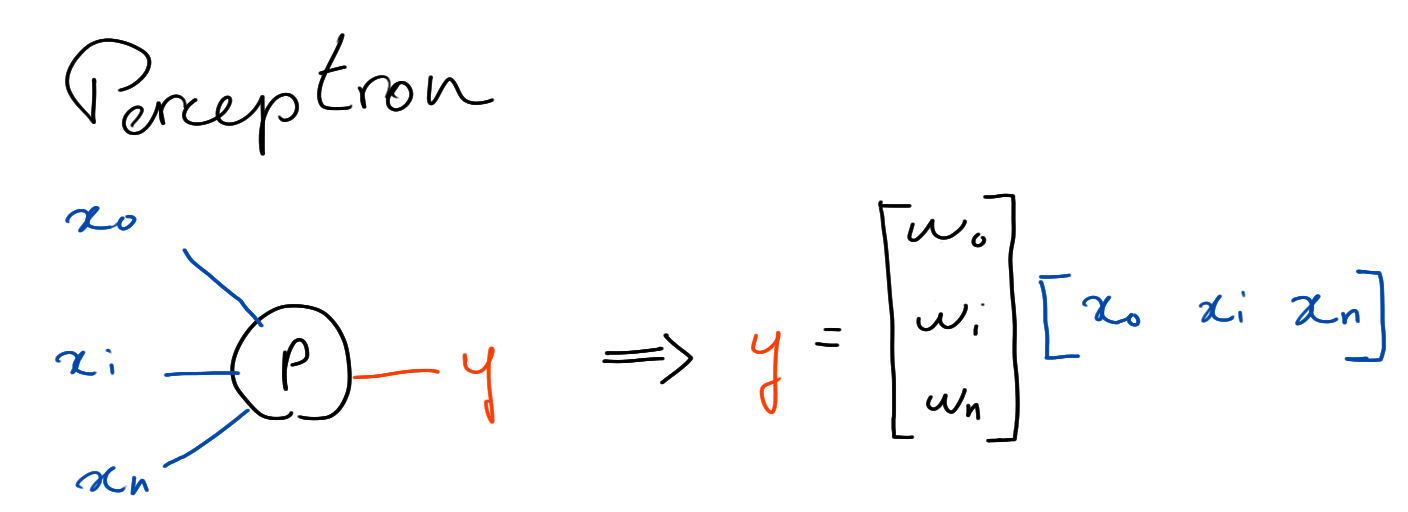">

<img src=" 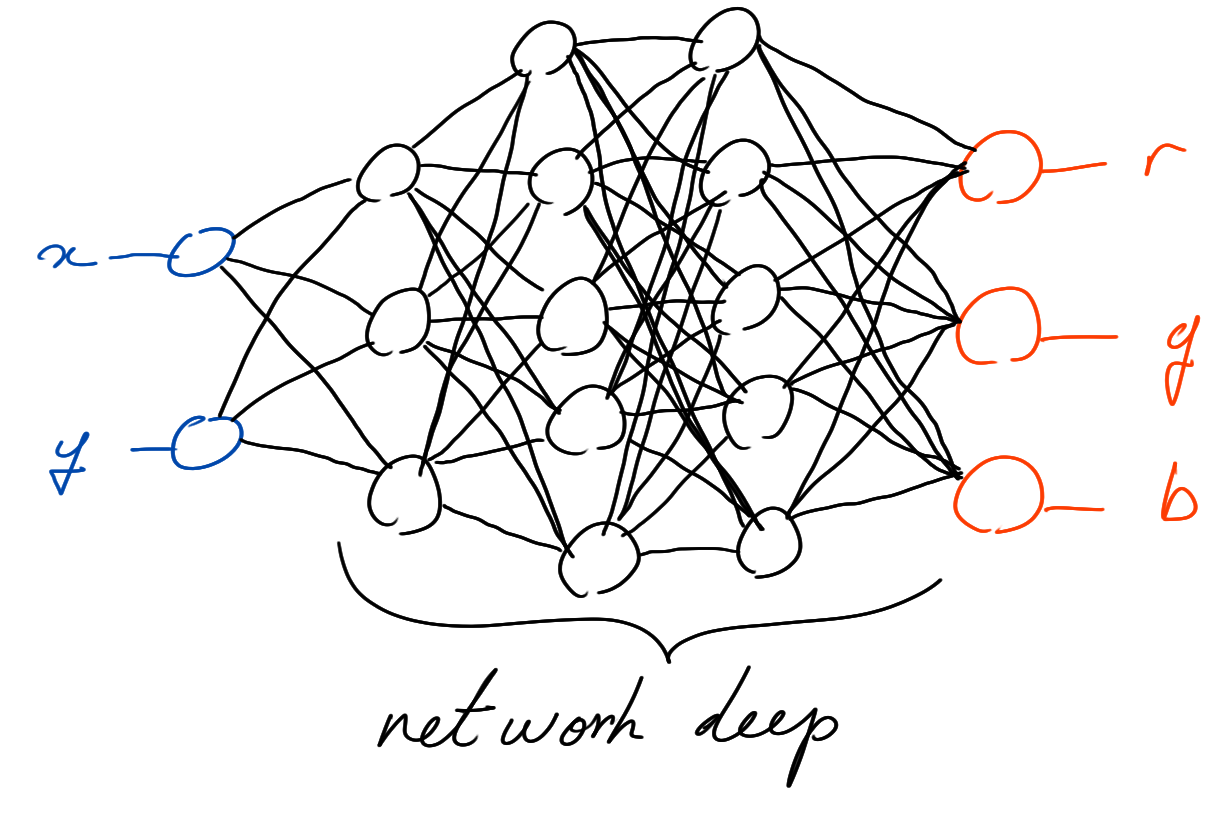">

## Build network

In [24]:
def build_nn(size, discretize=False):
    deep = [tf.keras.layers.Dense(l,  activation=tf.nn.tanh, use_bias=True) for l in size]
    
    nn = tf.keras.models.Sequential(
        [tf.keras.layers.Dense(2,  activation=tf.nn.tanh, use_bias=True)]
        + deep + 
        [tf.keras.layers.Dense(3,  activation=tf.nn.sigmoid, use_bias=False)])
    loss = 'categorical_crossentropy' if discretize else 'mean_squared_error'
    nn.compile(optimizer='adam', loss=loss)
    return nn

### More tuned

200/200 [==============================] - 0s 384us/sample - loss: 0.1267


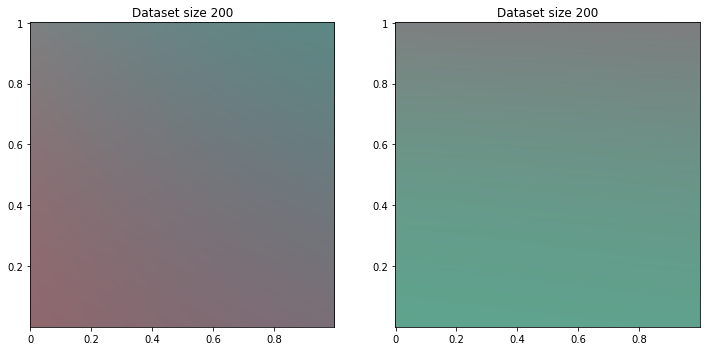

10200/10200 [==============================] - 0s 32us/sample - loss: 0.0870


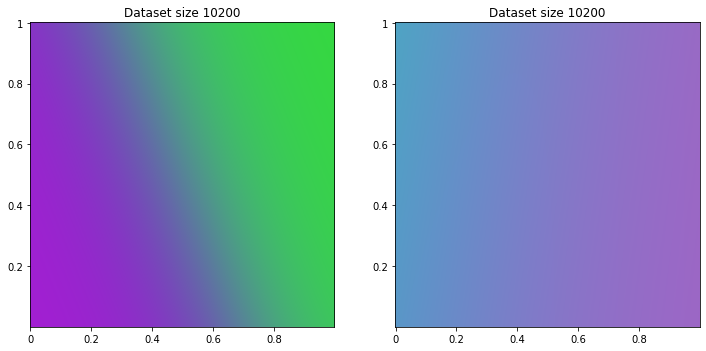

20200/20200 [==============================] - 1s 27us/sample - loss: 0.0498


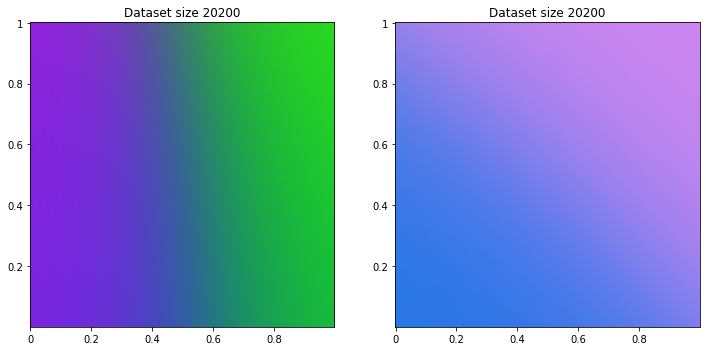

30200/30200 [==============================] - 1s 27us/sample - loss: 0.0416


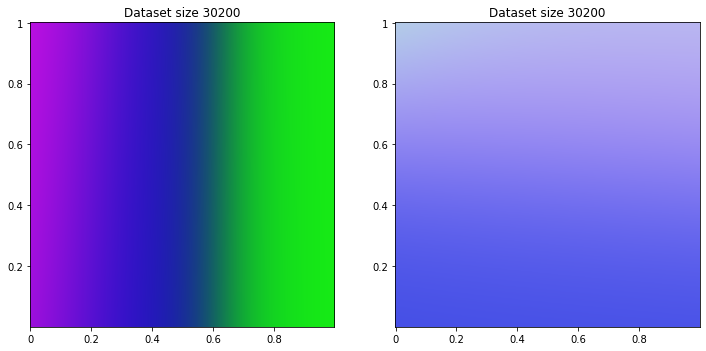

40200/40200 [==============================] - 1s 28us/sample - loss: 0.0379


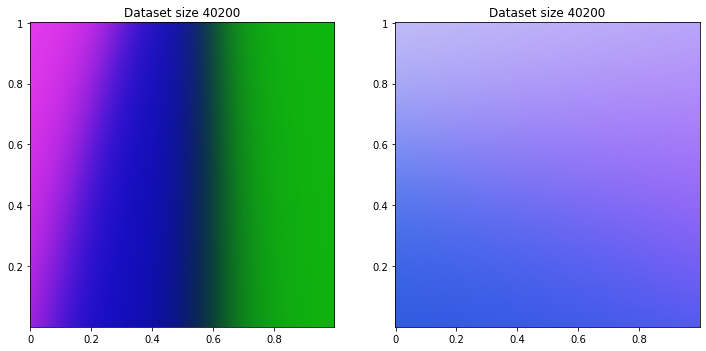

50200/50200 [==============================] - 2s 31us/sample - loss: 0.0329


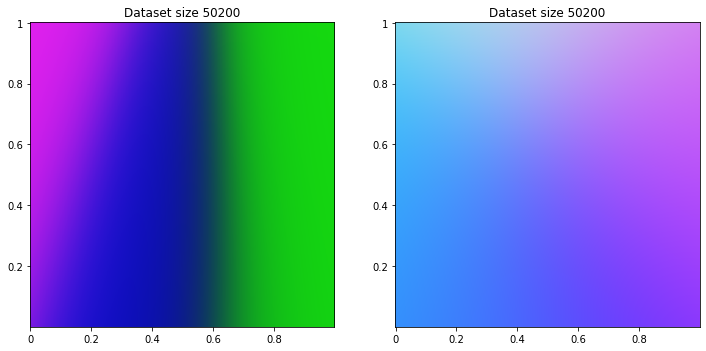

In [25]:
for size in range(200, 60000, 10000):
    nn_class_dataset = apply_ml(build_nn([5, 5], True), classifier_dataset, size)
    nn_reg_dataset = apply_ml(build_nn([5, 5]), regression_dataset, size)
    title = 'Dataset size {}'.format(size)
    print_dataset([nn_class_dataset, nn_reg_dataset], [title, title])

## Benchmark with true business

In [26]:
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Monet

/home/jolainfra/perso/machin-learning-course/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


50000/50000 [==============================] - 2s 31us/sample - loss: 0.0192


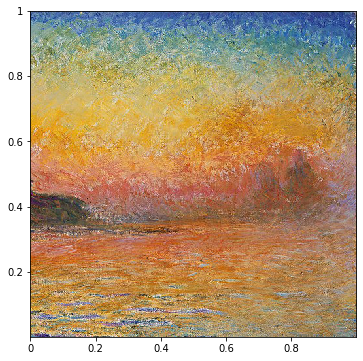

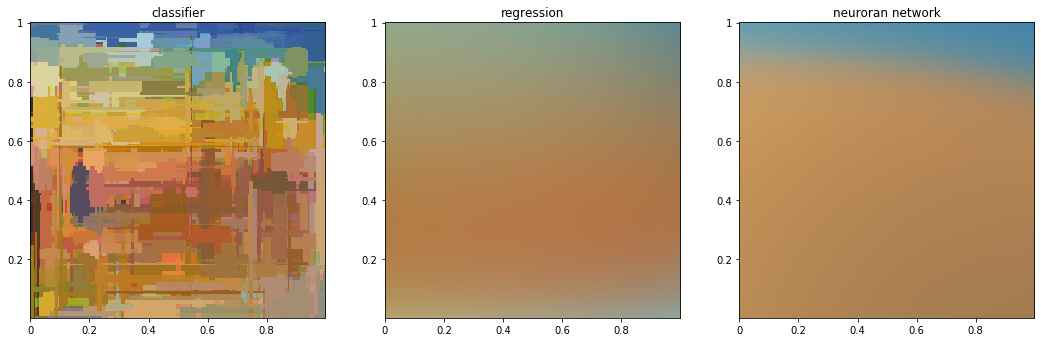

In [27]:
monet = np.asarray(Image.open('resources/monet.jpg')) / 256

class_monet_dataset = apply_ml(RandomForestClassifier(n_jobs=4), discretize_dataset(monet)) / 100
reg_monet_dataset = apply_ml(make_pipeline(PolynomialFeatures(degree=5), Ridge()), monet)
nn_monet_dataset = apply_ml(build_nn([5, 7, 4]), monet, 50000)

print_dataset(monet)

print_dataset([class_monet_dataset, reg_monet_dataset, nn_monet_dataset], ['classifier', 'regression', 'neuroran network'])

### Chagall

/home/jolainfra/perso/machin-learning-course/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


50000/50000 [==============================] - 1s 27us/sample - loss: 0.0298


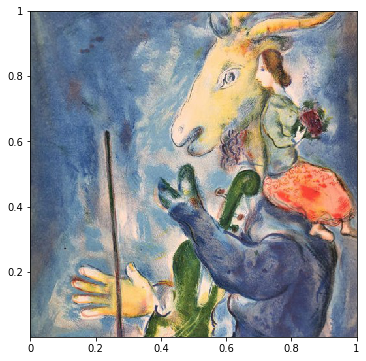

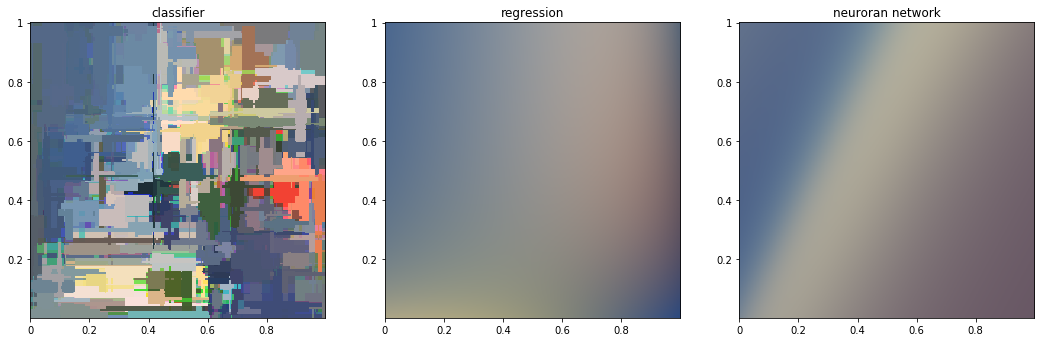

In [28]:
chagall = np.asarray(Image.open('resources/chagall.jpg')) / 256

class_chagall = apply_ml(RandomForestClassifier(n_jobs=4), discretize_dataset(chagall)) / 100
reg_chagall = apply_ml(make_pipeline(PolynomialFeatures(degree=8), Ridge()), chagall)
nn_chagall = apply_ml(build_nn([8, 8, 4]), chagall, 50000)

print_dataset(chagall)

print_dataset([class_chagall, reg_chagall, nn_chagall], ['classifier', 'regression', 'neuroran network'])

### Mondrian

/home/jolainfra/perso/machin-learning-course/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


50000/50000 [==============================] - 2s 35us/sample - loss: 1.8750


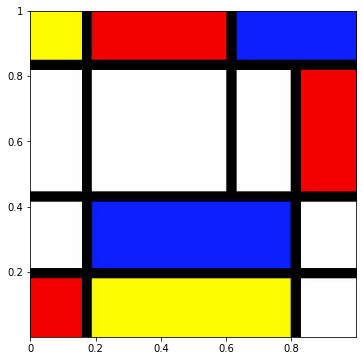

W0628 12:43:12.497635 140184450438976 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


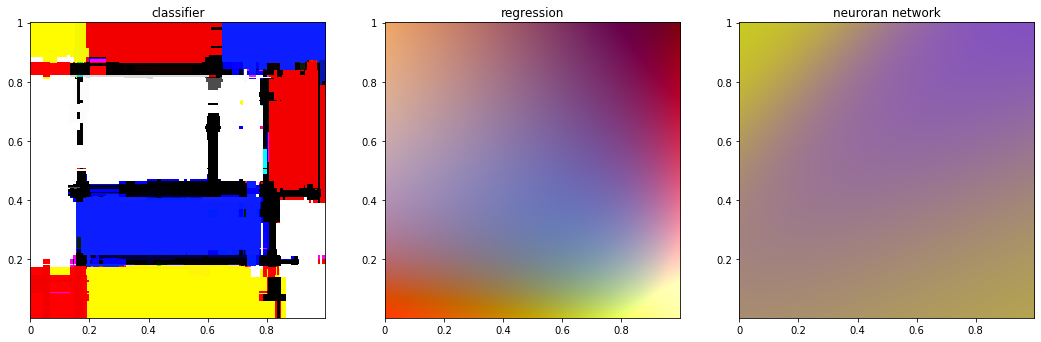

In [29]:
mondrian = np.asarray(Image.open('resources/mondrian.jpg')) / 256

class_mondrian = apply_ml(RandomForestClassifier(n_jobs=4), discretize_dataset(mondrian)) / 100
reg_mondrian = apply_ml(make_pipeline(PolynomialFeatures(degree=5), Ridge()), mondrian)
nn_mondrian = apply_ml(build_nn([5, 7, 4], True), mondrian, 50000)

print_dataset(mondrian)

print_dataset([class_mondrian, reg_mondrian, nn_mondrian], ['classifier', 'regression', 'neuroran network'])